In [1]:
#
# Practical 1 - Word2Vec
#

In [2]:
PROJECT_PATH = ".."

In [3]:
from time import time
from tqdm import tqdm
from pprint import pprint

from lib.data import load_TED_dataset
from lib.text import parse_text_to_word_sentences, get_top_frequent_words

In [4]:
content_text = load_TED_dataset(project_path=PROJECT_PATH)

ted_en-20160408.zip already downloaded.


In [5]:
pprint(content_text[10])

('I come from one of the most liberal, tolerant, progressive places in the '
 'United States, Seattle, Washington. And I grew up with a family of great '
 'Seattlites. My mother was an artist, my father was a college professor, and '
 'I am truly grateful for my upbringing, because I always felt completely '
 'comfortable designing my life exactly as I saw fit.\n'
 'And in point of fact, I took a route that was not exactly what my parents '
 'had in mind. When I was 19, I dropped out of college -- dropped out, kicked '
 'out, splitting hairs.\n'
 '(Laughter)\n'
 'And I went on the road as a professional French horn player, which was my '
 'lifelong dream. I played chamber music all over the United States and '
 'Europe, and I toured for a couple of years with a great jazz guitar player '
 'named Charlie Bird. And by the end of my 20s, I wound up as a member of the '
 'Barcelona Symphony Orchestra in Spain. What a great life.\n'
 'And you know, my parents never complained. They supporte

In [6]:
content_in_word_sentences = [parse_text_to_word_sentences(clip) for clip in tqdm(content_text)]

100%|██████████| 2085/2085 [00:08<00:00, 246.28it/s]


In [7]:
pprint(content_in_word_sentences[10])

[['i',
  'come',
  'from',
  'one',
  'of',
  'the',
  'most',
  'liberal',
  'tolerant',
  'progressive',
  'places',
  'in',
  'the',
  'united',
  'states',
  'seattle',
  'washington'],
 ['and', 'i', 'grew', 'up', 'with', 'a', 'family', 'of', 'great', 'seattlites'],
 ['my',
  'mother',
  'was',
  'an',
  'artist',
  'my',
  'father',
  'was',
  'a',
  'college',
  'professor',
  'and',
  'i',
  'am',
  'truly',
  'grateful',
  'for',
  'my',
  'upbringing',
  'because',
  'i',
  'always',
  'felt',
  'completely',
  'comfortable',
  'designing',
  'my',
  'life',
  'exactly',
  'as',
  'i',
  'saw',
  'fit'],
 ['and',
  'in',
  'point',
  'of',
  'fact',
  'i',
  'took',
  'a',
  'route',
  'that',
  'was',
  'not',
  'exactly',
  'what',
  'my',
  'parents',
  'had',
  'in',
  'mind'],
 ['when',
  'i',
  'was',
  '19',
  'i',
  'dropped',
  'out',
  'of',
  'college',
  'dropped',
  'out',
  'kicked',
  'out',
  'splitting',
  'hairs'],
 ['and',
  'i',
  'went',
  'on',
  'the',
 

  'obsession',
  'with',
  'poverty',
  'and',
  'liberals',
  'need',
  'conservatives',
  'and',
  'their',
  'obsession',
  'with',
  'free',
  'markets'],
 ['that',
  's',
  'the',
  'diversity',
  'in',
  'which',
  'lies',
  'the',
  'future',
  'strength',
  'of',
  'this',
  'country',
  'if',
  'we',
  'choose',
  'to',
  'take',
  'it'],
 ['so', 'how', 'are', 'we', 'going', 'to', 'do', 'it'],
 ['how', 'are', 'we', 'going', 'to', 'do', 'it', 'together'],
 ['i',
  've',
  'got',
  'to',
  'have',
  'some',
  'action',
  'items',
  'not',
  'just',
  'for',
  'you',
  'but',
  'for',
  'me'],
 ['action',
  'item',
  'number',
  'one',
  'remember',
  'it',
  's',
  'not',
  'good',
  'enough',
  'just',
  'to',
  'tolerate',
  'people',
  'who',
  'disagree'],
 ['it', 's', 'not', 'good', 'enough'],
 ['we',
  'have',
  'to',
  'remember',
  'that',
  'we',
  'need',
  'people',
  'who',
  'disagree',
  'with',
  'us',
  'because',
  'there',
  'are',
  'people',
  'who',
  'need'

In [8]:
content_all_sentences = [sentence for clip in content_in_word_sentences for sentence in clip]

In [9]:
from gensim.models import Word2Vec

print("Training Word2Vec model...")
start = time()
W2V_embeddings = Word2Vec(sentences=content_all_sentences, min_count=10)
print("Training Word2Vec model completed.")
print(time() - start)

Training Word2Vec model...
Training Word2Vec model completed.
19.04668092727661


In [10]:
pprint(W2V_embeddings.wv.most_similar("man"))
pprint(W2V_embeddings.wv.most_similar("dog"))
pprint(W2V_embeddings.wv.most_similar(positive=["man", "dog"], negative=["woman"]))
pprint(len(W2V_embeddings.wv.vocab))

[('woman', 0.853413999080658),
 ('guy', 0.8188145160675049),
 ('lady', 0.7923486828804016),
 ('boy', 0.7416967153549194),
 ('girl', 0.7416121959686279),
 ('gentleman', 0.7287613749504089),
 ('poet', 0.7113381624221802),
 ('soldier', 0.7045960426330566),
 ('david', 0.700631856918335),
 ('john', 0.6873451471328735)]
[('mom', 0.7948132157325745),
 ('cat', 0.7931559681892395),
 ('doctor', 0.7919812798500061),
 ('chair', 0.7837198972702026),
 ('leg', 0.7666435241699219),
 ('wife', 0.7665870785713196),
 ('dad', 0.7558816075325012),
 ('seat', 0.7491012215614319),
 ('arm', 0.7395236492156982),
 ('boyfriend', 0.7392485737800598)]
[('chair', 0.7235710620880127),
 ('cat', 0.6909080743789673),
 ('leg', 0.6892843842506409),
 ('chest', 0.6817792654037476),
 ('head', 0.6774687767028809),
 ('sandwich', 0.6725970506668091),
 ('uncle', 0.6707397699356079),
 ('pajamas', 0.6699609756469727),
 ('mom', 0.6690199375152588),
 ('arm', 0.6672092080116272)]
14319


In [11]:
top_frequent_words, top_words_frequency = get_top_frequent_words(
    [word for sentence in content_all_sentences for word in sentence],
    include_frequency=True,
)

100%|██████████| 4427526/4427526 [00:03<00:00, 1346604.23it/s]


['the', 'and', 'to', 'of', 'a', 'that', 'i', 'in', 'it', 'you', 'we', 'is', 's', 'this', 'so', 'they', 'was', 'for', 'are', 'have', 'but', 'what', 'on', 'with', 'can', 't', 'about', 'there', 'be', 'as', 'at', 'all', 'not', 'do', 'my', 'one', 're', 'people', 'like', 'if', 'from', 'now', 'our', 'an', 'these', 'just', 'or', 'he', 'when', 'because', 'very', 'me', 'out', 'by', 'them', 'how', 'up', 'going', 'know', 'had', 'more', 'think', 'who', 'were', 'see', 'their', 'your', 'which', 'would', 'here', 'really', 'get', 've', 'then', 'm', 'world', 'us', 'time', 'some', 'has', 'don', 'actually', 'into', 'way', 'where', 'will', 'things', 'years', 'other', 'could', 'want', 'well', 'go', 'been', 'no', 'make', 'she', 'something', 'those', 'said']


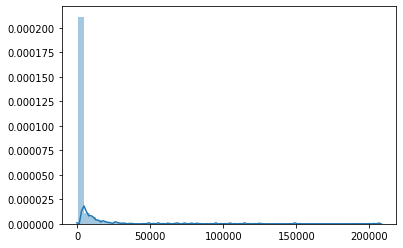

In [12]:
import seaborn as sns

print(top_frequent_words[:100])
sns.distplot(top_words_frequency)

In [13]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [14]:
from sklearn.manifold import TSNE

top_frequent_words_embeddings = W2V_embeddings[top_frequent_words]
top_frequent_words_tsne = TSNE(n_components=2, random_state=0).fit_transform(
    top_frequent_words_embeddings
)

/Users/zhenyulin/Library/Caches/pypoetry/virtualenvs/deep-learning-nlp-practicals-l1hfGhmH-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=top_frequent_words_tsne[:,0],
                                    x2=top_frequent_words_tsne[:,1],
                                    names=top_frequent_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)